# Testing hypotheses to increase revenue

Together with the marketing department of a large online store, a list of hypotheses for increasing revenue was prepared.
We need to prioritize hypotheses, run an A/B test, and analyze the results.

**Work Plan**

- **Step 1. Open data files, study general information and prepare data**

    File path:
    - /datasets/hypothesis.csv
    - /datasets/orders.csv
    - /datasets/visitors.csv
     
    
- **Step 2. Prioritize hypotheses**

    The file /datasets/hypothesis.csv contains 9 hypotheses for increasing the revenue of an online store with the specified parameters Reach, Impact, Confidence, Effort.
    - Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority;
    - Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority;
    - We will indicate how the prioritization of hypotheses has changed when using RICE instead of ICE. Let's explain why this happened.
    
    
- **Step 3. A/B test analysis**

    We conducted an A/B test and got the results, which are described in the /datasets/orders.csv and /datasets/visitors.csv files.
    Let's analyze the A/B test:
    - Let's build a graph of cumulative revenue by groups. Let's draw conclusions and assumptions;
    - Let's build a graph of the cumulative average check for groups. Let's draw conclusions and assumptions;
    - Let's build a graph of the relative change in the cumulative average check of group B to group A. Let's draw conclusions and assumptions;
    - Let's build a graph of cumulative conversion by groups. Let's draw conclusions and assumptions;
    - Let's build a graph of the relative change in the cumulative conversion of group B to group A. Draw conclusions and assumptions;
    - Let's build a point graph of the number of orders by users. Let's draw conclusions and assumptions;
    - Let's calculate the 95th and 99th percentiles of the number of orders per user. Let's choose a border to identify anomalous users;
    - Let's build a dot chart of order values. Let's draw conclusions and assumptions;
    - Calculate the 95th and 99th percentiles of order value. Let's choose a border to detect anomalous orders;
    - Calculate the statistical significance of differences in conversion between groups according to "raw" data. Let's draw conclusions and assumptions;
    - Let's calculate the statistical significance of the differences in the average check of the order between the groups according to the "raw" data. Let's draw conclusions and assumptions;
    - Calculate the statistical significance of differences in conversion between groups according to the "cleaned" data. Let's draw conclusions and assumptions;
    - Let's calculate the statistical significance of the differences in the average check of the order between the groups according to the "cleaned" data. Let's draw conclusions and assumptions;
    - We will make a decision based on the results of the test and explain it. Solutions: 1. Stop the test, record the victory of one of the groups. 2. Stop the test, record the absence of differences between groups. 3. Continue the test.
      
      
- **Step 4. Write a general conclusion**


- **Description of data**

   File `/datasets/hypothesis.csv` (hypotheses to increase the revenue of an online store):

    - `Hypothesis` - a brief description of the hypothesis
    - `Reach` - user coverage on a 10-point scale
    - `Impact` - impact on users on a 10-point scale
    - `Confidence` - confidence in the hypothesis on a 10-point scale
    - `Efforts` - the cost of resources to test the hypothesis on a 10-point scale. The larger the `Efforts` value, the more expensive the hypothesis test

  File `/datasets/orders.csv` (A/B test results):

    - `transactionId` — order identifier
    - `visitorId` — identifier of the user who made the order
    - `date` — date when the order was made
    - `revenue` — order revenue
    - `group` — the A/B test group the order is in

  File `/datasets/visitors.csv` (A/B test results):

    - `date` — date
    - `group` — A/B test group
    - `visitors` - the number of users on the specified date in the specified A/B test group

## Loading data and preparing it for analysis
Let's load the data into variables. Optimizing data for analysis. Make sure the data type in each column is correct. File path:

 -   /datasets/hypothesis.csv. 
 -   /datasets/orders.csv. 
 -   /datasets/visitors.csv.

### Data overview

Let's open the tables and see general information about them.

In [1]:
# import required libraries
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
# reading data files and storing in variables
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('C:/Users/tatar/downloads/hypothesis.csv')
    
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('C:/Users/tatar/downloads/orders.csv')
    
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('C:/Users/tatar/downloads/visitors.csv')

# displaying the first 5 rows of tables
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'Hypothesis' column in hypothesis dataset shows the hypothesis in Russian:
    
    * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - Add two new channels to attract traffic, which will attract 30% more users
    * Запустить собственную службу доставки, что сократит срок доставки заказов - Launch your own delivery service, which will reduce the delivery time of orders
    * Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - Add product recommendation blocks to the online store website to increase conversion and average check of the order
    * Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар - Change the structure of categories, which will increase the conversion, because. users will find the right product faster
    * Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей - Change the background color of the main page to increase user engagement
</div>

In [3]:
# getting general information about the data
hypothesis.info()
print('\n')
orders.info()
print('\n')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 

In [4]:
# counting duplicates in tables
print(hypothesis.duplicated().sum()) 
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


**Conclusions**

* It is necessary to replace the column names, bring them to lower case and the correct style;
* It is necessary to cast data in columns containing date and time information to the correct type;
* There are no missing values;
* No duplicates.

### Data preprocessing

Let's replace the column names, bring them to lowercase and the correct style.

In [5]:
# renaming columns
hypothesis.rename(str.lower, axis='columns', inplace=True) 
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}) 

# check
print(hypothesis.columns) 
print(orders.columns) 

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


Convert data containing date and time information to `datetime` format.

In [6]:
# changing the type of data containing date and time information
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# check
print(orders['date'].dtypes)
print(visitors['date'].dtypes) 

datetime64[ns]
datetime64[ns]


**Conclusions**

So we did the following:
* Replaced the names of the columns, brought them to lower case and the correct type;
* Resulted in the correct type of data in columns containing date and time information.

## Prioritization of hypotheses

We will prioritize hypotheses using the `ICE` and `RICE` frameworks.

Let's use the ICE framework to prioritize hypotheses. Let's add a column with the results of the ICE calculation to the hypothesis table and sort the hypotheses in descending order of priority.

In [7]:
pd.set_option('display.max_colwidth', None) # setting display column width by content

hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'Hypothesis' column in hypothesis dataset shows the hypothesis in Russian:
    
    * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - Add two new channels to attract traffic, which will attract 30% more users
    * Запустить собственную службу доставки, что сократит срок доставки заказов - Launch your own delivery service, which will reduce the delivery time of orders
    * Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - Add product recommendation blocks to the online store website to increase conversion and average check of the order
    * Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар - Change the structure of categories, which will increase the conversion, because. users will find the right product faster
    * Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей - Change the background color of the main page to increase user engagement
    * Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов - Add a customer reviews page about the store, which will increase the number of orders
    * Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию - Display banners with current promotions and sales on the main page to increase conversion
    * Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - Add a subscription form to all main pages to build a customer base for email newsletters
    * Запустить акцию, дающую скидку на товар в день рождения - Launch a promotion that gives a discount on goods on your birthday
</div>

**Most promising hypotheses for ICE:**

* 8 - Launch a promotion that gives a discount on goods on your birthday;
* 0 - Add two new channels to attract traffic, which will attract 30% more users;
* 7 - Add a subscription form to all main pages to build a customer base for email newsletters
* 6 - Display banners with current promotions and sales on the main page to increase conversion.

Let's use the RICE framework to prioritize hypotheses. Let's add a column with the results of the RICE calculation to the hypothesis table and sort the hypotheses in descending order of priority.

In [8]:
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts'], 3)
display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'Hypothesis' column in hypothesis dataset shows the hypothesis in Russian:
    
    * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - Add two new channels to attract traffic, which will attract 30% more users
    * Запустить собственную службу доставки, что сократит срок доставки заказов - Launch your own delivery service, which will reduce the delivery time of orders
    * Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - Add product recommendation blocks to the online store website to increase conversion and average check of the order
    * Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар - Change the structure of categories, which will increase the conversion, because. users will find the right product faster
    * Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей - Change the background color of the main page to increase user engagement
    * Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов - Add a customer reviews page about the store, which will increase the number of orders
    * Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию - Display banners with current promotions and sales on the main page to increase conversion
    * Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - Add a subscription form to all main pages to build a customer base for email newsletters
    * Запустить акцию, дающую скидку на товар в день рождения - Launch a promotion that gives a discount on goods on your birthday
</div>

**The most promising hypotheses according to RICE:**

* 7 - Add a subscription form to all main pages to build a customer base for email newsletters;
* 2 - Add blocks of product recommendations to the website of the online store in order to increase the conversion and the average check of the order;
* 0 - Add two new channels to attract traffic, which will attract 30% more users;
* 6 - Display banners with current promotions and sales on the main page to increase conversion.

**Conclusions**

- The most promising hypothesis for ICE at number 8 was in fifth place when calculating RICE. This can be explained by the value of the `reach` indicator - the number of users that will be affected by the change. This factor also influenced other hypotheses;
- Nevertheless, taking into account the results of both prioritizations of hypotheses in a complex way, the most important of them can be distinguished:
    * 7 - Add a subscription form to all main pages to build a customer base for email newsletters;
    * 0 - Add two new channels to attract traffic, which will attract 30% more users;
    * 6 - Display banners with current promotions and sales on the main page to increase conversion.

## A/B test analysis

We ran an A/B test and got the results described in `/datasets/orders.csv` and `/datasets/visitors.csv`.

Let's analyze the results of the A/B test.

First, let's check how many groups we have in the A/B test.

In [9]:
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


There are 2 groups in the results of the A/B test (A and B).

Now let's define the start and end dates for the A/B test.

In [10]:
print('A/B test start date for the orders table:', min(orders['date'].dt.date))
print('A/B test end date for the orders table:', max(orders['date'].dt.date))
print('\n')
print('A/B test start date for the visitors table:', min(visitors['date'].dt.date))
print('A/B test end date for the visitors table:', max(visitors['date'].dt.date))

A/B test start date for the orders table: 2019-08-01
A/B test end date for the orders table: 2019-08-31


A/B test start date for the visitors table: 2019-08-01
A/B test end date for the visitors table: 2019-08-31


The testing period is the same for both tables.

Determine the number of users in each group. To do this, we will form an auxiliary dataframe `orders_by_group` based on the `orders` table, in which there will be columns with the following columns: `unique_group_size` - the number of unique users in the group, `group_size` - the total number of users in the group, `both_groups_size` - the number of users, included in both groups.

In [11]:
orders_by_group = (
    orders.groupby('group')
    .agg({'visitor_id': ['nunique', 'count']})
)
orders_by_group.columns = ['unique_group_size', 'group_size']
orders_by_group['both_groups_size'] = orders_by_group['group_size'] - orders_by_group['unique_group_size']
orders_by_group

,unique_group_size,group_size,both_groups_size
group,,,
A,503,557,54
B,586,640,54


**Conclusions**

According to the preliminary analysis of the results of the A/B test:
- Checked that there are two testing groups, A and B;
- Determined that the test took place in the interval from 08/01/2019 to 08/31/2019;
- We determined the size of the groups, in group A - 503 users, in B - 586 users, 54 users are included in both groups.

### Graph of cumulative revenue by groups

To build graphs, you need to collect cumulative data. Let's form a `cumulative_data` dataframe with columns:

- `date` — date;
- `group` — A/B test group (A or B);
- `orders` - cumulative number of orders for the specified date in the specified group;
- `buyers` - cumulative number of users who made at least one order on the specified date in the specified group;
- `revenue` — cumulative revenue as of the specified date in the specified group (average bill);
- `visitors` - the cumulative number of visitors to the online store on the specified date in a certain group.

In [12]:
# create an array of unique pairs of date values and test groups
dates_groups = orders[['date','group']].drop_duplicates()

# we get aggregated cumulative data on orders by day 
orders_aggregated = dates_groups.apply(lambda x:
                                       orders[np.logical_and(
                                           orders['date'] <= x['date'],
                                           orders['group'] == x['group'])]
                                       .agg({'date' : 'max',
                                             'group' : 'max',
                                             'transaction_id' : 'nunique',
                                             'visitor_id' : 'nunique',
                                             'revenue' : 'sum'}),
                                       axis=1).sort_values(by=['date','group'])

# we get aggregated cumulative by day data about online store visitors
visitors_aggregated = dates_groups.apply(lambda x:
                                         visitors[np.logical_and(
                                             visitors['date'] <= x['date'],
                                             visitors['group'] == x['group'])]
                                         .agg({'date' : 'max',
                                               'group' : 'max',
                                               'visitors' : 'sum'}),
                                         axis=1).sort_values(by=['date','group'])

# we combine cumulative data in one table and assign understandable names to its columns
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Let's build graphs of cumulative revenue by days and groups of A/B testing.

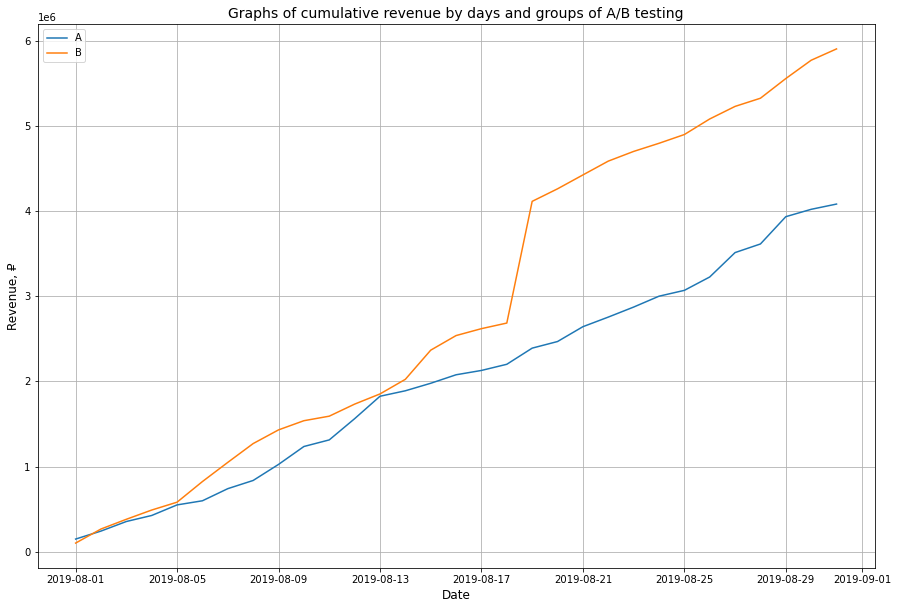

In [13]:
# dataframe with cumulative number of orders and cumulative revenue by day in group A
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# dataframe with cumulative number of orders and cumulative revenue by day in group B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# set the size for charts
plt.figure(figsize=(15, 10))

# build a revenue schedule for group A
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# build a revenue schedule for group B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.grid(visible=True)
plt.title('Graphs of cumulative revenue by days and groups of A/B testing', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue, ₽', fontsize=12)
plt.legend() 
plt.show()

**According to the graphs, we can draw the following conclusions:**
- Revenue increases almost evenly throughout the test in both groups.
- However, Group B's revenue curve at one point rose sharply. This may signal a spike in orders, or very expensive orders in the sample during that particular period.

### Graph of the cumulative average check by groups

Let's build graphs of the cumulative average check by days and groups of A/B testing.

To do this, we divide the cumulative revenue by the cumulative number of orders.

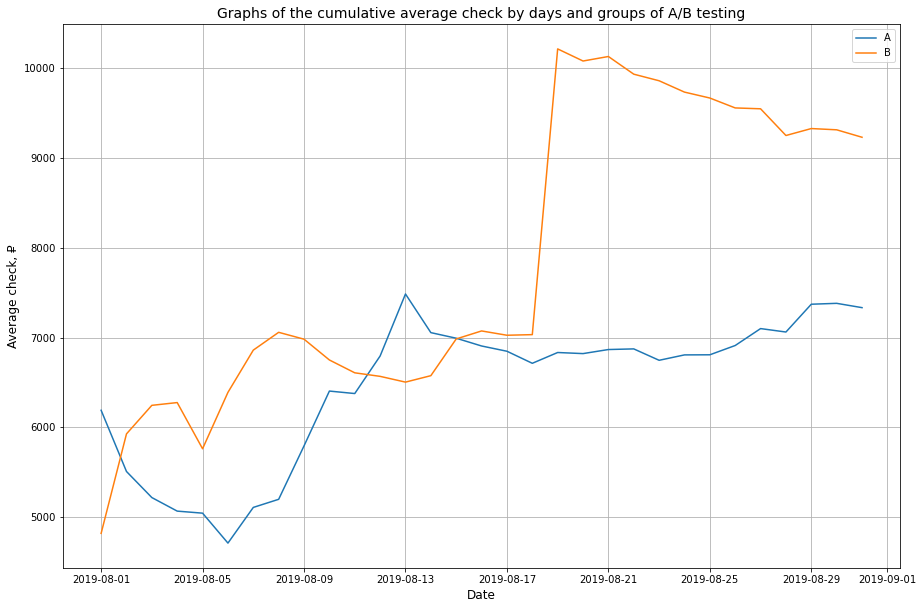

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.grid(visible=True)
plt.title('Graphs of the cumulative average check by days and groups of A/B testing', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average check, ₽', fontsize=12)
plt.legend() 
plt.show()

**According to the graphs, we can draw the following conclusions:**
- The average check in group A after a fall and a sharp increase has become more uniform with an upward trend.
- The average check in group B at one point increased sharply, as did the revenue (assuming large orders). There is some trend towards a decrease in the average check in this group. The values of the average check of both groups are different.

### Graph of the relative change in the cumulative average check of group B to group A

Let's build a graph of the relative difference for the average check.

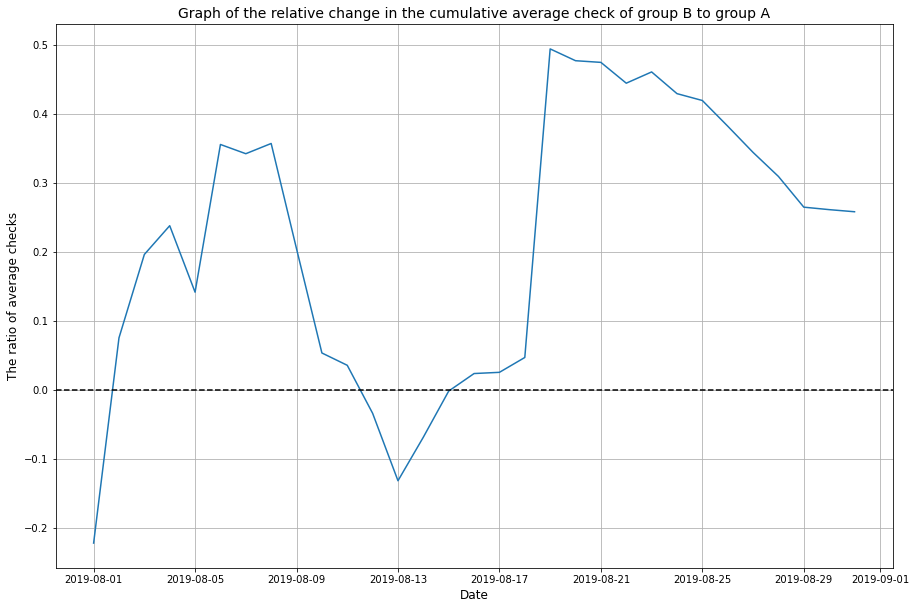

In [15]:
# collect data in one dataframe
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# set the size for the chart
plt.figure(figsize=(15, 10))

# build the ratio of average bills
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/
          merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/
          merged_cumulative_revenue['ordersA'])-1)

# add x axis
plt.axhline(y=0, color='black', linestyle='--')

plt.grid(visible=True)
plt.title('Graph of the relative change in the cumulative average check of group B to group A', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('The ratio of average checks', fontsize=12)
plt.show()

**According to the schedule, we can draw the following conclusions:**
- At several points, the graph of the difference between the segments jumps sharply. This indicates the presence of large orders.

### Graph of cumulative conversion by groups

Let's build a graph of cumulative conversion by groups.

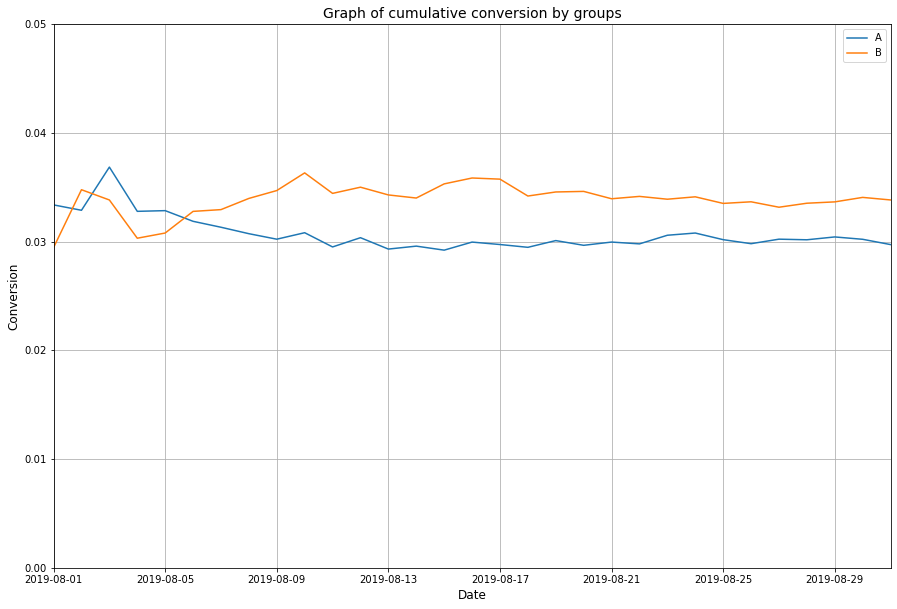

In [16]:
# converters that allow you to use pandas types in matplotlib 
register_matplotlib_converters()

# calculate cumulative conversion
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# separating data by group A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# separating data by group B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# set the size for charts
plt.figure(figsize=(15, 10))

# we build graphs
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

# set the scale of the axes
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]) 

plt.grid(visible=True)
plt.title('Graph of cumulative conversion by groups', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Conversion', fontsize=12)
plt.legend()
plt.show()

**According to the schedule, we can draw the following conclusions:**
- Groups fluctuated around the same value, but then the conversion of group B took the lead and fixed, and the conversion of group A dipped and also fixed.

### Graph of the relative change in the cumulative conversion of group B to group A

Let's plot the relative change in the cumulative conversion of group B to group A.

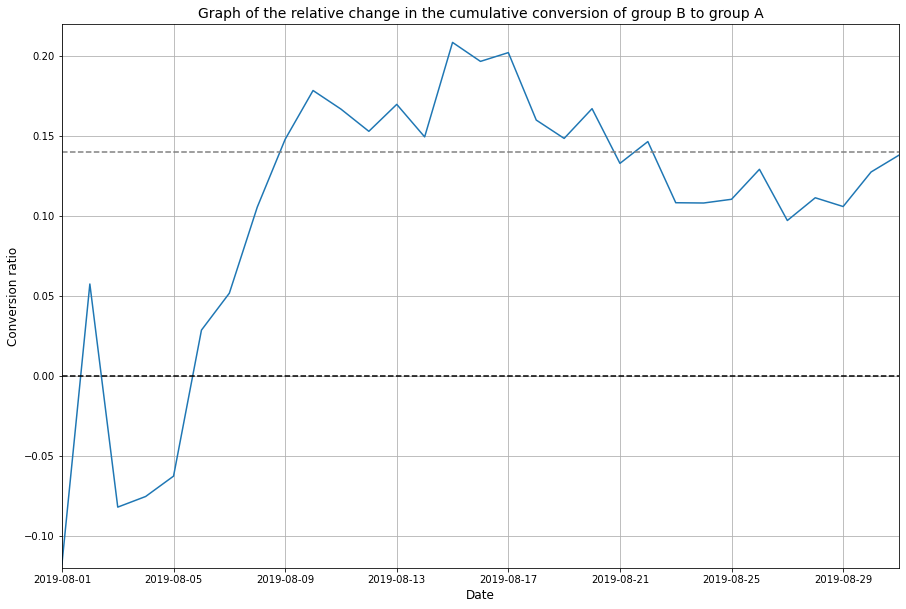

In [17]:
# collect data in one dataframe
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

# set the size for the chart
plt.figure(figsize=(15, 10))

# building the ratio of conversions
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversionB']/
         merged_cumulative_conversions['conversionA']-1)

# add x-axis
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')

# set the scale of the axes
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.12, 0.22])

plt.grid(visible=True)
plt.title('Graph of the relative change in the cumulative conversion of group B to group A', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Conversion ratio', fontsize=12)
plt.show()

**According to the schedule, we can draw the following conclusions:**
- At the beginning of the test, group B lost to group A, then pulled ahead and gradually grows.
- In general, the ratio of conversion has not yet been established, and now it is impossible to draw any conclusions from the test. It is necessary to analyze the anomalies, perhaps they will change the picture.

### Scatter plot of the number of orders by users

To begin with, let's form the `orders_by_users` dataframe in order to see the number of orders by users.

In [18]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
    .sort_values(by='transaction_id', ascending=False)
    .rename(columns={'transaction_id': 'orders'})
)

display(orders_by_users.head(10))

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


We have determined that there are several users with a large number of orders.

Let's build a histogram of the distribution of the number of orders per user.

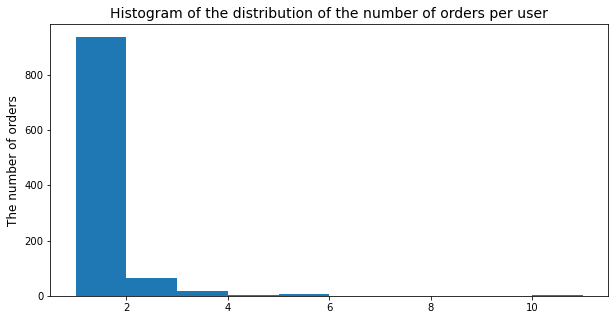

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(orders_by_users['orders']) 
plt.title('Histogram of the distribution of the number of orders per user', fontsize=14)
plt.ylabel('The number of orders', fontsize=12)
plt.show()

Most buyers ordered only once. However, there are users with 2-4 orders.

Let's build a dot plot of the number of orders by users.

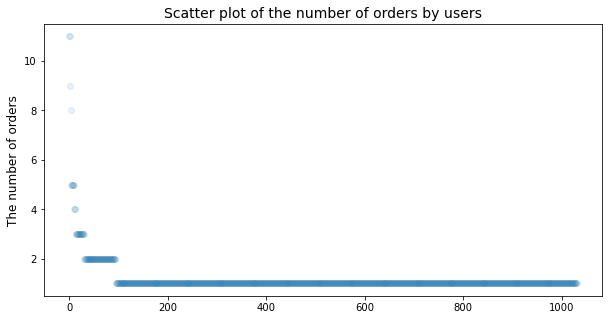

In [20]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.1)
plt.title('Scatter plot of the number of orders by users', fontsize=14)
plt.ylabel('The number of orders', fontsize=12)
plt.show()

**According to the graphs, we can draw the following conclusions:**
- There are some users with 2-4 orders. Their exact proportion is not clear - it is not clear whether to consider them anomalies or not.

### Calculation of the 95th and 99th percentiles of orders per user. Choosing a boundary to detect abnormal users

Calculate the 95th and 99th percentiles of orders per user.

In [21]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


**Conclusions**
* No more than 5% of users placed more than 2 orders;
* 1% of users ordered more than 4 times;
* It is reasonable to choose 4 orders per user for the lower limit of the number of orders, and weed out anomalous users according to it.

### Dot plot of order values

First, let's look at the top 10 most expensive orders by value.

In [22]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


We have determined that several users placed orders for large amounts.

Let's build a histogram of the distribution of order costs.

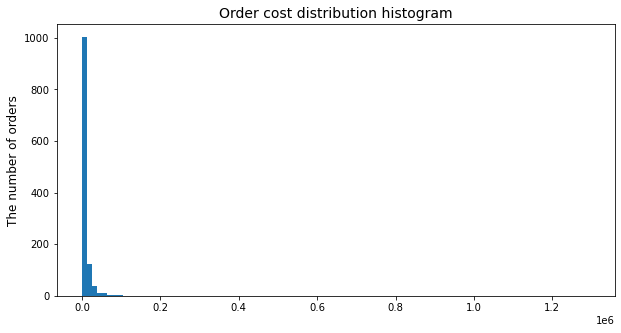

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(orders['revenue'], bins=100) 
plt.title('Order cost distribution histogram', fontsize=14)
plt.ylabel('The number of orders', fontsize=12)
plt.show()

It is impossible to draw conclusions from such a histogram, so we will build a dotted graph of the distribution of order costs.

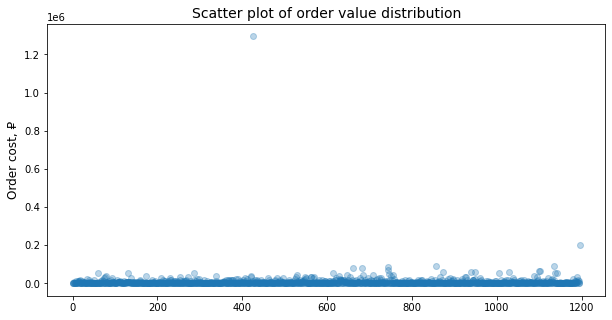

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.title('Scatter plot of order value distribution', fontsize=14)
plt.ylabel('Order cost, ₽', fontsize=12)
plt.show()

For a more detailed analysis, let's build a scatter plot with a changed scale. 

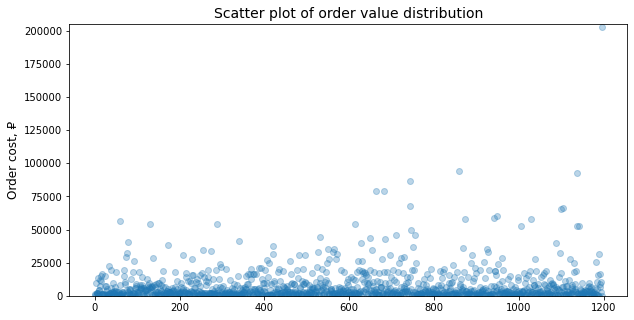

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.3)
plt.ylim(0, 205000)
plt.title('Scatter plot of order value distribution', fontsize=14)
plt.ylabel('Order cost, ₽', fontsize=12)
plt.show()

**According to the graphs, we can draw the following conclusions:**
- There are some expensive orders. According to the schedule, you can choose the border of abnormal orders between 25,000 and 60,000 rubles. Their exact proportion is not clear - it is not clear whether to consider them anomalies or not.

### Calculation of the 95th and 99th percentiles of the cost of orders. Choosing a boundary to detect abnormal users

Calculate the 95th and 99th percentiles of order value.

In [26]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


**Conclusions**
* No more than 5% of orders cost more than 28,000 rubles;
* 1% of orders cost more than 58,233.2 rubles;
* It is reasonable to choose 28,000 rubles for the lower limit of the cost of orders, and weed out abnormal orders for it.

### Calculation of the statistical significance of differences in conversion between groups based on "raw" data

Let's formulate hypotheses:
   * H₀ - no differences in conversion between groups;
   * H₁ - there are differences in conversion between groups.
   
To calculate the statistical significance of differences in conversion between groups, we need to prepare the available data. Let's create a new dataframe `data` with the following columns:

- `date` - date;
- `orders_per_date_a` - number of orders on the selected date in group A;
- `revenue_per_date_a` - total revenue on the selected date in group A;
- `orders_per_date_b` - number of orders on the selected date in group B;
- `revenue_per_date_b` - total revenue on the selected date in group B;
- `orders_cummulative_a` - total number of orders up to the selected date inclusive in group A;
- `revenue_cummulative_a` - total revenue up to the selected date inclusive in group A;
- `orders_cummulative_b` - total number of orders up to the selected date inclusive in group B;
- `revenue_cummulative_b` - total revenue up to the selected date inclusive in group B;
- `visitors_per_date_a` - the number of users on the selected date in group A;
- `visitors_cummulative_a` - the number of users up to the selected date inclusive in group A;
- `visitors_per_date_b` - the number of users on the selected date in group B;
- `visitors_cummulative_b` - the number of users up to and including the selected date in group B.

In [27]:
# calculation of the number of users on the selected date in group A
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# calculation of the number of users up to the selected date inclusive in group A
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# calculation of the number of users on the selected date in group B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# calculation of the number of users up to the selected date inclusive in group B
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# calculation of the number of orders and total revenue on the selected date in group A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# calculation of the total number of orders up to and including the selected date in group A
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# calculation of the number of orders and total revenue on the selected date in group B
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# calculation of the total number of orders up to the selected date inclusive in group B
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

# combining dataframes into one common
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Let's create variables `orders_by_users_a` and `orders_by_users_b` with columns `['visitor_id', 'orders']`. In them, for users who ordered at least 1 time, we indicate the number of completed orders. Let's declare the variables `sample_a` and `sample_b`, in which users with orders will correspond to the number of user orders, and users without orders will be zero. Let's calculate the statistical significance of the conversion difference based on the results of the month of the test. Apply the Mann-Whitney test. Let's derive a p-value to compare conversion between groups. Calculate and display the relative difference in conversion between groups.

In [28]:
# formation of dataframes in which the number of completed orders is indicated
# for users who ordered at least 1 time
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

# formation of variables in which users with orders
# will match the number of user orders,
# and zeros for users without orders
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_a'].sum() -
                          len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_b'].sum() -
                          len(orders_by_users_b['orders'])), name='orders')], axis=0)

# calculation of the statistical significance of the conversion difference
# based on the results of the Mann-Whitney test
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))

# calculation of the relative difference in conversion between groups
print('Relative difference in average conversion between groups on raw data:',
      '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

p-value = 0.017
Relative difference in average conversion between groups on raw data: 0.138


**Conclusions**
* p-value = 0.017, which is less than 0.05. This means that the null hypothesis of no differences in raw data in conversion between groups can be rejected.
* The average conversion of group B is greater than the average conversion of group A.

### Calculation of the statistical significance of differences in the average order receipt between groups according to "raw" data

Let's formulate hypotheses:

    * H₀ - there are no differences in the average check between groups;
    * H₁ - there are differences in the average check between groups.
   
To calculate the statistical significance of the differences in the average check, we pass data on revenue from orders to the `mannwhitneyu()` criterion. We will also find relative differences in the average check between groups.

In [29]:
# calculation of the statistical significance of the difference in the average
# bill according to the results of the Mann-Whitney test
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]))

# calculation of the relative difference in the average check between groups
print('Relative difference in the average check between groups according to raw data:',
      '{0:.3f}'.format(
          orders[orders['group']=='B']['revenue'].mean()/
          orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Relative difference in the average check between groups according to raw data: 0.259


**Conclusions**
* p-value = 0.729, which is much more than 0.05. This means that there is no reason to reject the null hypothesis and assume that there are differences in the average check.
* The average check of group B is much higher than the average check of group A.

### Calculation of the statistical significance of differences in conversion between groups according to "cleaned" data

Recall that the previously found 95th and 99th percentiles of average bills are 28,000 and 58,233.2 rubles. And the 95th and 99th percentiles of orders per user are 2 and 4 orders per user.

Let's take as anomalous users those who made at least 2 orders or made an order more expensive than 28,000 rubles and write this in the variables `many_orders` and `expensive_orders`. So we will remove 5% of users with the largest number of orders and from 1% to 5% of users with expensive orders. Let's make cuts of users with more than 2 orders - `users_with_many_orders` and users who have made orders more than 28,000 - `users_with_expensive_orders`. Let's combine them in the `abnormal_users` table. We also find out how many anomalous users there are using the `shape()` method.

In [30]:
many_orders = np.percentile(orders_by_users['orders'], 95)
expensive_orders = np.percentile(orders['revenue'], 95)
users_with_many_orders = pd.concat([
    orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
    orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id']], axis=0)
users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']
abnormal_users = (pd.concat([
    users_with_many_orders,
    users_with_expensive_orders], axis=0)
                  .drop_duplicates()
                  .sort_values())

print(abnormal_users.head())
print('\n')
print('Number of anomalous users:', abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64


Number of anomalous users: 74


Let's find out how the actions of 74 users influenced the results of the test. Let's calculate the statistical significance of the differences in conversion between test groups based on the cleaned data. Let's prepare samples of the number of orders by users by test groups and apply the Mann-Whitney statistical test to the resulting samples.

Hypotheses:

    * H₀ - no differences in conversion between groups;
    * H₁ - there are differences in conversion between groups.

In [31]:
sample_a_filtered = pd.concat([
    orders_by_users_a[np.logical_not(
        orders_by_users_a['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() -
                                 len(orders_by_users_a['orders'])), name='orders')], axis=0)

sample_b_filtered = pd.concat([
    orders_by_users_b[np.logical_not(
        orders_by_users_b['visitor_id']
        .isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() -
                                 len(orders_by_users_b['orders'])), name='orders')], axis=0)

# calculation of the statistical significance of the conversion 
# difference based on the results of the Mann-Whitney test
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

# calculation of the relative difference in conversion between groups
print('Relative difference in average conversion between groups according to cleaned data:',
      '{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value = 0.013
Relative difference in average conversion between groups according to cleaned data: 0.173


**Conclusions**
* p-value = 0.013, which is less than 0.05. This means that the null hypothesis of no differences in the "cleaned" data in the conversion between groups can be rejected. According to the "raw" data, the p-value was 0.017.
* The mean conversion of group B is greater than the mean conversion of group A. The relative difference in conversion between groups on raw data was 0.138.
* The results for "cleaned" data differ slightly from the results for "raw" data.

### Calculation of the statistical significance of differences in the average order receipt between groups according to "cleaned" data

Let's formulate hypotheses:

    * H₀ - there are no differences in the average check between groups;
    * H₁ - there are differences in the average check between groups.
   
Let's pass the `mannwhitneyu()` criterion with data on revenue from orders without taking into account anomalous users and also find the relative differences in the average check between groups.

In [32]:
print('p-value =',
      '{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'], 
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'])[1]))

print('Relative difference in the average check between groups according to cleaned data:',
      '{0:.3f}'.format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id']
                       .isin(abnormal_users)))]['revenue'].mean() - 1))

p-value = 0.738
Relative difference in the average check between groups according to cleaned data: -0.020


**Conclusions**
* p-value = 0.738, which is much more than 0.05. This means that there is no reason to reject the null hypothesis and believe that there are differences in the average check for “cleaned” data. According to the "raw" data, the p-value was 0.729.
* However, according to the “cleaned” data, the average check of group A is greater than the average check of group B. According to the “raw” data, it was the opposite, the relative difference in the average check between groups was 0.259.

## General conclusion

The main task of the study was to prioritize hypotheses, run an A/B test, and analyze the results.

To conduct a correct analysis, it was necessary to process the available data:

* Replace column names, bring them to lower case and correct style;
* Convert to the correct data type in columns containing date and time information.

In the course of prioritizing the hypotheses for the ICE and RICE frameworks, it was possible to identify the most important of them:

* Add a subscription form to all main pages to build a customer base for email newsletters (hypothesis #7);
* Add two new channels for attracting traffic, which will attract 30% more users (hypothesis No. 0);
* Show banners with current promotions and sales on the main page to increase conversion (hypothesis No. 6).

Let's highlight the main theses of the analysis of the results of the A / B test:

* The cumulative average check of group B is higher than the average check of group A by 25.9% by the end of the test;
* The cumulative conversion of group B is higher than the conversion of group A by 13.8% by the end of the test;
* No more than 5% of all users placed more than 2 orders, 1% of users ordered more than 4 times;
* No more than 5% of all orders cost more than 28,000 rubles, 1% of orders cost more than 58,233.2 rubles;
* A statistically significant difference in conversion between groups is present both in the raw data and in the data after filtering out anomalies. Relative difference in average conversion between groups (ratio of average conversion of group B to average conversion of group A): 0.138 for raw data and 0.173 for cleared data;
* There is no statistically significant difference in the average check between the groups, neither according to the "raw" nor according to the data after filtering out anomalies. Relative difference in the average check between groups (the ratio of the average check of group B to the average check of group A): 0.259 according to the "raw" data and -0.020 according to the "cleaned" data;
* The graph of the difference in conversion between groups shows that the results of group B are better than group A and there is a significant trend towards improvement.
* The graph of the difference in the average check shows that the results of group B, despite attempts to grow, have a slight downward trend, including the influence of large orders. According to the "cleaned" data, the average check of group A turned out to be higher than the average check of group B.
* Based on the facts found, the test should continue. Even though segment B conversion is better than segment A, there is reason to believe that there is a downward trend in the average check of segment B. It needs to be tracked, and this will take more time. Based on the emerging upward trend in the graph of the difference in conversion between groups approximately two weeks before the end of the test, you can assign a continuation period of testing to two weeks.